## Part 3: Data Wrangling and Transformation.

* ### One-Hot Encoding

In [19]:
# One-Hot Encoding Train dataset
train = pd.get_dummies(train,columns=['State', 'Category'])

# Drop target variable 
train = train.drop(columns=['Profit'])


In [20]:
train.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,Category_Financials,Category_Healthcare,Category_Industrials,Category_None,Category_Oil & Gas,Category_Technology,Category_Telecommunications
ID,,,,,,,,,,,,,
0,165349.20,136897.80,471784.10,0,0,1,0,0,1,0,0,0,0
1,162597.70,151377.59,443898.53,1,0,0,0,0,0,0,0,1,0
2,153441.51,101145.55,407934.54,0,1,0,0,1,0,0,0,0,0
3,144372.41,118671.85,383199.62,0,0,1,1,0,0,0,0,0,0
4,142107.34,91391.77,366168.42,0,1,0,0,0,1,0,0,0,0


In [21]:
train.shape

(50, 13)

In [22]:
# One Hot-Encoding Test dataset
test = pd.get_dummies(test,columns=['State', 'Category'])

In [23]:
test.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,State_None,Category_Financials,Category_Healthcare,Category_Industrials,Category_Oil & Gas,Category_Technology,Category_Telecommunications
ID,,,,,,,,,,,,,
0,165349.20,136897.80,471784.10,0,0,1,0,0,0,1,0,0,0
1,162597.70,151377.59,443898.53,1,0,0,0,0,0,0,0,1,0
2,153441.51,101145.55,407934.54,0,1,0,0,0,1,0,0,0,0
3,144372.41,118671.85,383199.62,0,0,1,0,1,0,0,0,0,0
4,142107.34,91391.77,366168.42,0,1,0,0,0,0,1,0,0,0


In [24]:
test.shape

(50, 13)

In [25]:
# Drop unnecessary variables 
train = train.drop(columns=['Category_None'])
test = test.drop(columns=['State_None'])

* ### StandardScaler

In [26]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#sc_train = sc.fit_transform(train)
#sc_test = sc.fit_transform(test)

In [27]:
#sc_train = pd.DataFrame(sc_train)
#sc_train.head()

In [28]:
#sc_test = pd.DataFrame(sc_test)
#sc_test.head()

* ### Creating datasets for ML part

In [29]:
# set 'X' for features of scaled Train dataset 'sc_train'
#X = sc_train

# set 'y' for the target 'Profit'
#y = target

# 'X_Test' for features of scaled Test dataset 'sc_test'
#X_Test = sc_test

In [30]:
# set 'X' for features of scaled Train dataset 'sc_train'
X = train

# set 'y' for the target 'Profit'
y = target

# 'X_Test' for features of scaled Test dataset 'sc_test'
X_Test = test

* ### 'Train\Test' split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [33]:
X_train.shape

(35, 12)

In [34]:
X_test.shape

(15, 12)

## Part 4: Machine Learning.

* ### Build, train, evaluate and visualise models

* #### Linear Regression

In [35]:
# Linear Regression model
LR = LinearRegression()

# Model Training
LR.fit(X_train,y_train)

# Model Prediction
LR_pred = LR.predict(X_test)
LR_pred

array([ 98805.75002446, 120582.06246646, 137745.21283983,  79034.09403155,
       188946.03574103, 118622.88055624,  72254.79066   ,  67164.69815167,
       128666.63674181, 142782.3087556 ,  91593.10175464,  80612.80343627,
       101576.44119369, 101521.36354767, 125192.09524706])

In [36]:
# Model R2 score
LRscore = LR.score(X_test, y_test)

In [37]:
# Model Metrics
LRMetrics = pd.DataFrame({'Model': 'Linear Regression',
                          'r2score':r2_score(y_test,LR_pred),
                          'MAE': metrics.mean_absolute_error (y_test,LR_pred),
                          'MSE': metrics.mean_squared_error(y_test,LR_pred),
                          'RMSE': np.sqrt(metrics.mean_squared_error(y_test,LR_pred)),
                          'MSLE': metrics.mean_squared_log_error(y_test,LR_pred),
                          'RMSLE':np.sqrt(metrics.mean_squared_log_error(y_test,LR_pred))             
                          },index=[1])

LRMetrics

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Linear Regression,0.789688,11029.42834,2.030035e+08,14247.930908,0.019417,0.139346


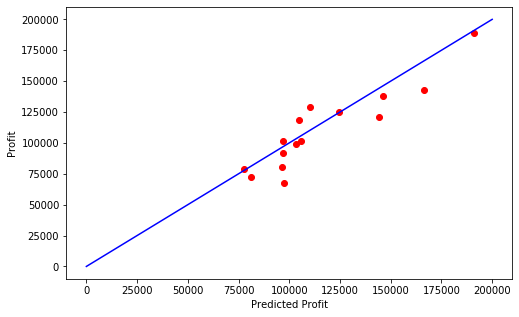

In [38]:
# visualisation of Train dataset predictions

# Plot outputs
plt.figure(figsize=(8,5))
pl.plot(y_test, LR_pred,'ro')
pl.plot([0,200000],[0,200000],'b-')
pl.xlabel('Predicted Profit')
pl.ylabel('Profit')
pl.show()

In [39]:
# Test final predictions
LR_pred1 = LR.predict(X_Test)
LR_pred1  

array([173426.18101741, 189136.03555657, 188946.03574103, 172036.55217563,
       142782.3087556 , 167404.74613989, 149507.66869685, 157587.3922617 ,
       161999.46205811, 156553.51538032, 139352.35038226, 120582.06246646,
       123602.43674921, 100870.47894581, 145214.20798084, 136337.33249719,
       115045.39296363, 128341.08289509, 125192.09524706, 120516.13649408,
       112463.0053601 , 124542.37179041, 128666.63674181, 109208.23838339,
       109268.13666644, 103605.55516326, 101576.44119369, 118622.88055624,
        97349.61154671,  96055.59746149,  97834.88695235,  67164.69815167,
        79791.40130303,  91593.10175464, 101521.36354767,  80612.80343627,
        75658.16264028,  81945.35628307,  72254.79066   ,  74848.96219321,
        87297.82122284,  79034.09403155,  73120.64657189,  69758.98      ,
        54155.9502917 ,  48109.28237089,  70180.21341563, 102747.18569225,
        34091.10390916,  66953.92003678])

In [40]:
# Model Metrics
LRMetrics1 = pd.DataFrame({'Model': 'Linear Regression',
                           'r2score':r2_score(y,LR_pred1),
                           'MAE': metrics.mean_absolute_error (y,LR_pred1),
                           'MSE': metrics.mean_squared_error(y,LR_pred1),
                           'RMSE': np.sqrt(metrics.mean_squared_error(y,LR_pred1)),
                           'MSLE': metrics.mean_squared_log_error(y,LR_pred1),
                           'RMSLE':np.sqrt(metrics.mean_squared_log_error(y,LR_pred1))             
                           },index=[1])

LRMetrics1

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Linear Regression,0.826878,11442.48225,2.756271e+08,16602.021239,0.077744,0.278826


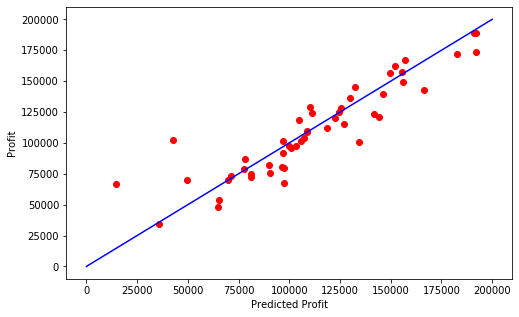

In [41]:
# visualisation of Test dataset predictions

# Plot outputs
plt.figure(figsize=(8,5))
pl.plot(y, LR_pred1,'ro')
pl.plot([0,200000],[0,200000],'b-')
pl.xlabel('Predicted Profit')
pl.ylabel('Profit')
pl.show()

In [42]:
# comparison between Actual 'Profit' from Train dataset abd Predicted 'Profit' from Test dataset
actualvspredicted = pd.DataFrame({"Actual Profit":y,"LR Predicted Profit":LR_pred1 })
actualvspredicted.head(10).style.background_gradient(cmap='Blues')

,Actual Profit,LR Predicted Profit
0,192262,173426
1,191792,189136
2,191050,188946
3,182902,172037
4,166188,142782
5,156991,167405
6,156123,149508
7,155753,157587
8,152212,161999
9,149760,156554


* #### Gradient Boosting Regressor

In [43]:
# Gradient Boosting Regressor model
GB=GradientBoostingRegressor(random_state=0)

# Model Training
GB.fit(X_train,y_train)

# Model Prediction
GB_pred = GB.predict(X_test)

# Model R2 score
GBscore =GB.score(X_test, y_test)

In [44]:
# Model Metrics
GBMetrics = pd.DataFrame({'Model': 'Gradient Boosting Regressor',
                          'r2score':r2_score(y_test,GB_pred),
                          'MAE': metrics.mean_absolute_error (y_test,GB_pred),
                          'MSE': metrics.mean_squared_error(y_test,GB_pred),
                          'RMSE': np.sqrt(metrics.mean_squared_error(y_test,GB_pred)),
                          'MSLE': metrics.mean_squared_log_error(y_test,GB_pred),
                          'RMSLE':np.sqrt(metrics.mean_squared_log_error(y_test,GB_pred))             
                          },index=[2])

GBMetrics

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
2,Gradient Boosting Regressor,0.871975,8794.067752,1.235755e+08,11116.451707,0.015324,0.123789


In [45]:
# Test final predictions
GB_pred1 = GB.predict(X_Test)

In [46]:
# Model Metrics
GBMetrics1 = pd.DataFrame({'Model': 'GradientBoostingRegressor',
                           'r2score':r2_score(y,GB_pred1),
                           'MAE': metrics.mean_absolute_error (y,GB_pred1),
                           'MSE': metrics.mean_squared_error(y,GB_pred1),
                           'RMSE': np.sqrt(metrics.mean_squared_error(y,GB_pred1)),
                           'MSLE': metrics.mean_squared_log_error(y,GB_pred1),
                           'RMSLE':np.sqrt(metrics.mean_squared_log_error(y,GB_pred1))             
                          },index=[1])

GBMetrics1

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,GradientBoostingRegressor,0.972002,3554.613741,4.457490e+07,6676.443468,0.007986,0.089364


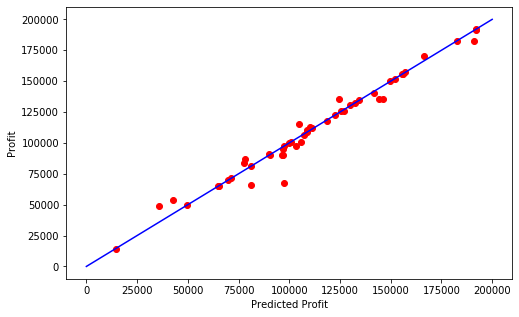

In [47]:
# visualisation of Test dataset predictions

# Plot outputs
plt.figure(figsize=(8,5))
pl.plot(y, GB_pred1,'ro')
pl.plot([0,200000],[0,200000], 'b-')
pl.xlabel('Predicted Profit')
pl.ylabel('Profit')
pl.show()

### Model comparison

In [48]:
# score comparison of models
frames = [LRMetrics1,GBMetrics1]
TrainingResult = pd.concat(frames)
TrainingResult

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Linear Regression,0.826878,11442.482250,2.756271e+08,16602.021239,0.077744,0.278826
1,GradientBoostingRegressor,0.972002,3554.613741,4.457490e+07,6676.443468,0.007986,0.089364


In [49]:
# comparison between Actual 'Profit' from Train dataset abd Predicted 'Profit' from Test dataset
actualvspredicted = pd.DataFrame({"Actual Profit":y,"LR Predicted Profit":LR_pred1, "GB Predicted Profit":GB_pred1})
actualvspredicted.head(10).style.background_gradient(cmap='Blues')

,Actual Profit,LR Predicted Profit,GB Predicted Profit
0,192262,173426,191868
1,191792,189136,191631
2,191050,188946,182312
3,182902,172037,182851
4,166188,142782,170184
5,156991,167405,156991
6,156123,149508,156065
7,155753,157587,155657
8,152212,161999,152091
9,149760,156554,150396


**Result**: The best model is **Gradient Boosting Regressor** with **R2 score = 0.972002**.

##  Conclusion.

In [52]:
# submission of .csv file with final predictions
sub = pd.DataFrame()
sub['ID'] = test.index
sub['Profit'] = GB_pred1
sub.to_csv('StartupPredictions.csv', index=False)